In [2]:
import pandas as pd
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

matplotlib.style.use('ggplot')
%matplotlib inline  


### Load Training Data:

In [108]:
#dataset column names:

col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# id: engine id
# cycle: cycle number. a sequence starts from 1 to the cycle # where failure has happened
# setting?: engine setting
# s1 to s21: sensors measurments on each cycle
# the dataset contains data of 100 engines with each engine run for number cycles to failure

In [109]:
#load training data

df_tr_raw = pd.read_csv('data/PM_train.txt', sep = ' ', header=None)
df_tr_raw.head()

0   1       2       3      4       5       6        7        8      9  ...  \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62 ...   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62 ...   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62 ...   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62 ...   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62 ...   

        18      19    20   21    22     23     24       25  26  27  
0  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

In [111]:
#drop extra space columnn
df_tr_raw.drop([26,27], axis=1, inplace='True')

In [112]:
#assign column names
df_tr_raw.columns = col_names
df_tr_raw.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5   ...        s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62   ...     521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62   ...     522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62   ...     522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62   ...     522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62   ...     522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

In [8]:
df_tr_raw.tail()

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
20626  100    196   -0.0004   -0.0003     100.0  518.67  643.49  1597.98   
20627  100    197   -0.0016   -0.0005     100.0  518.67  643.54  1604.50   
20628  100    198    0.0004    0.0000     100.0  518.67  643.42  1602.46   
20629  100    199   -0.0011    0.0003     100.0  518.67  643.23  1605.26   
20630  100    200   -0.0032   -0.0005     100.0  518.67  643.85  1600.38   

            s4     s5   ...        s12      s13      s14     s15   s16  s17  \
20626  1428.63  14.62   ...     519.49  2388.26  8137.60  8.4956  0.03  397   
20627  1433.58  14.62   ...     519.68  2388.22  8136.50  8.5139  0.03  395   
20628  1428.18  14.62   ...     520.01  2388.24  8141.05  8.5646  0.03  398   
20629  1426.53  14.62   ...     519.67  2388.23  8139.29  8.5389  0.03  395   
20630  1432.14  14.62   ...     519.30  2388.26  8137.33  8.5036  0.03  396   

        s18    s19    s20      s21  
20626  2388  100.0  38.49  22.9735  
20627  2388  100.0  38.30  23.1594  
20628  2388  100.0  38.44  22.9333  
20629  2388  100.0  38.29  23.0640  
20630  2388  100.0  38.37  23.0522  

[5 rows x 26 columns]

In [9]:
df_tr_raw.describe()

id         cycle      setting1      setting2  setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0   
mean      51.506568    108.807862     -0.000009      0.000002     100.0   
std       29.227633     68.880990      0.002187      0.000293       0.0   
min        1.000000      1.000000     -0.008700     -0.000600     100.0   
25%       26.000000     52.000000     -0.001500     -0.000200     100.0   
50%       52.000000    104.000000      0.000000      0.000000     100.0   
75%       77.000000    156.000000      0.001500      0.000300     100.0   
max      100.000000    362.000000      0.008700      0.000600     100.0   

                 s1            s2            s3            s4            s5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

           ...                s12           s13           s14           s15  \
count      ...       20631.000000  20631.000000  20631.000000  20631.000000   
mean       ...         521.413470   2388.096152   8143.752722      8.442146   
std        ...           0.737553      0.071919     19.076176      0.037505   
min        ...         518.690000   2387.880000   8099.940000      8.324900   
25%        ...         520.960000   2388.040000   8133.245000      8.414900   
50%        ...         521.480000   2388.090000   8140.540000      8.438900   
75%        ...         521.950000   2388.140000   8148.310000      8.465600   
max        ...         523.380000   2388.560000   8293.720000      8.584800   

                s16           s17      s18      s19           s20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.556432e-14      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

                s21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 26 columns]

### Data Wrangling:

In [124]:
#check for missing data:

df_na = df_tr_raw[df_tr_raw.isnull()]
df_na.count()


id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

In [117]:

def make_labels (df_in, period):
    
    """
    df_in: input dataframe
    period: number of cycles used in classification modelling
    returns the input dataframe with additional 3 label columns: ttf, label_bnc, and label_mcc
    
    add labels to the training data:
        for regression: ttf (time-to-failure) = last cycle for the enging - each record cycle for the same engine
        for binary classification: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        for multi-class classification: label_mcc = 2 if ttf <= 0.5*period paramter, 1 if ttf<= period, else 2 (values = 0,1,2)
    """
    
    #create regression label
    
    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']
    
    #add time-to-failure ttf as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace='True')
    
    #create binary classification label
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in
    

In [115]:
#add labels to training data with period set to 30 cycles
df_tr_lbl = make_labels(df_tr_raw, 30)

### Exploratory Data Analysis:

In [116]:
#exclude enging id and cycle number from the input features:

featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

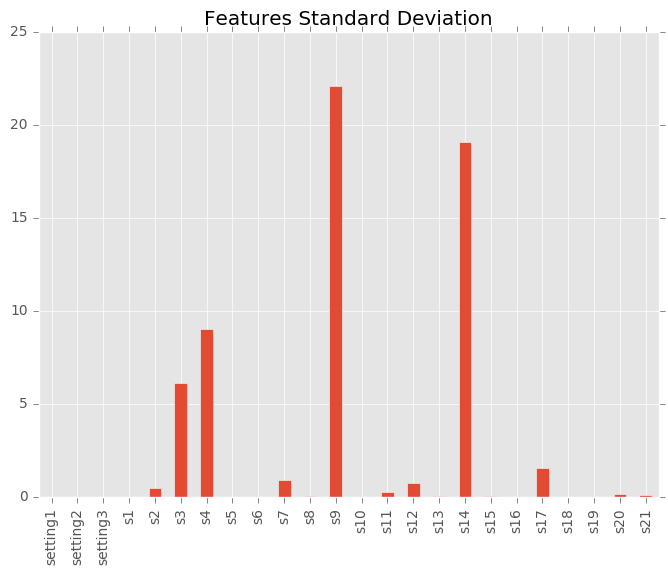

In [127]:
#plot and compare the standard deviation of input features:

df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

In [128]:
#plot and compare the log standard deviation of input features:
df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), logy=True,title="Sensors Standard Deviation (log)")

In [66]:
# get ordered list of top variance features:

#featurs_top_var = df_tr_lbl[featurs].var().sort_values(ascending=False).index.tolist()
featurs_top_var = df_tr_lbl[featurs].var().sort_values(ascending=False)
featurs_top_var

s9          4.876536e+02
s14         3.639005e+02
s4          8.101089e+01
s3          3.759099e+01
s17         2.398667e+00
s7          7.833883e-01
s12         5.439850e-01
s2          2.500533e-01
s11         7.133568e-02
s20         3.266927e-02
s21         1.171825e-02
s13         5.172330e-03
s8          5.038938e-03
s15         1.406628e-03
setting1    4.784340e-06
s6          1.929279e-06
setting2    8.588541e-08
s1          4.273435e-21
s5          1.152399e-23
s10         2.172333e-25
s16         2.422479e-28
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
dtype: float64

In [50]:
# get ordered list features correlation with regression label ttf

df_tr_lbl[featurs].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -1.280033e-18
s5         -1.280033e-18
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [130]:
# list of features having low or no correlation with regression label ttf

low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']
df_tr_lbl[low_cor_featrs].describe()

setting3            s1           s10      s18      s19           s16  \
count   20631.0  2.063100e+04  2.063100e+04  20631.0  20631.0  2.063100e+04   
mean      100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
std         0.0  6.537152e-11  4.660829e-13      0.0      0.0  1.556432e-14   
min       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
25%       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
50%       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
75%       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   
max       100.0  5.186700e+02  1.300000e+00   2388.0    100.0  3.000000e-02   

                 s5      setting1      setting2  
count  2.063100e+04  20631.000000  20631.000000  
mean   1.462000e+01     -0.000009      0.000002  
std    3.394700e-12      0.002187      0.000293  
min    1.462000e+01     -0.008700     -0.000600  
25%    1.462000e+01     -0.001500     -0.000200  
50%    1.462000e+01      0.000000      0.000000  
75%    1.462000e+01      0.001500      0.000300  
max    1.462000e+01      0.008700      0.000600

In [131]:
# list of features having high correlation with regression label ttf

high_cor_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']
df_tr_lbl[high_cor_featurs].describe()

s12            s7           s21           s20            s6  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean     521.413470    553.367711     23.289705     38.816271     21.609803   
std        0.737553      0.885092      0.108251      0.180746      0.001389   
min      518.690000    549.850000     22.894200     38.140000     21.600000   
25%      520.960000    552.810000     23.221800     38.700000     21.610000   
50%      521.480000    553.440000     23.297900     38.830000     21.610000   
75%      521.950000    554.010000     23.366800     38.950000     21.610000   
max      523.380000    556.060000     23.618400     39.430000     21.610000   

                s14            s9           s13            s8            s3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    8143.752722   9065.242941   2388.096152   2388.096652   1590.523119   
std       19.076176     22.082880      0.071919      0.070985      6.131150   
min     8099.940000   9021.730000   2387.880000   2387.900000   1571.040000   
25%     8133.245000   9053.100000   2388.040000   2388.050000   1586.260000   
50%     8140.540000   9060.660000   2388.090000   2388.090000   1590.100000   
75%     8148.310000   9069.420000   2388.140000   2388.140000   1594.380000   
max     8293.720000   9244.590000   2388.560000   2388.560000   1616.910000   

                s17            s2           s15            s4           s11  
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000  
mean     393.210654    642.680934      8.442146   1408.933782     47.541168  
std        1.548763      0.500053      0.037505      9.000605      0.267087  
min      388.000000    641.210000      8.324900   1382.250000     46.850000  
25%      392.000000    642.325000      8.414900   1402.360000     47.350000  
50%      393.000000    642.640000      8.438900   1408.040000     47.510000  
75%      394.000000    643.000000      8.465600   1414.555000     47.700000  
max      400.000000    644.530000      8.584800   1441.490000     48.530000

In [ ]:
# add the regression label 'ttf' to the list of high corr features 

high_cor_featurs_lbl = high_cor_featurs + ['ttf']

In [87]:
#create scatter matrix to disply correlation between features and features/regression label

scatter_matrix(df_tr_lbl[high_cor_featurs_lbl], alpha=0.2, figsize=(20, 20), diagonal='kde')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013889B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001D8FBB00>]], dtype=object)

In [149]:
def explore_col(s, e):
    
    """
    create 4 plots for input column s
    plot1: histogram of the input column s
    plot2: boxplot of the input column s
    plot3: line plot (time series) of the input column s over cycle. 
            The e parameter decide how many engines to plot from 1 to 100, 0:all engines, >100: all engines.
            engines will be selected randomly with no seed.
    plot4: scatter plot of input column s vs. regression label ttf
    
    """
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    #np.random.seed(12345)
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

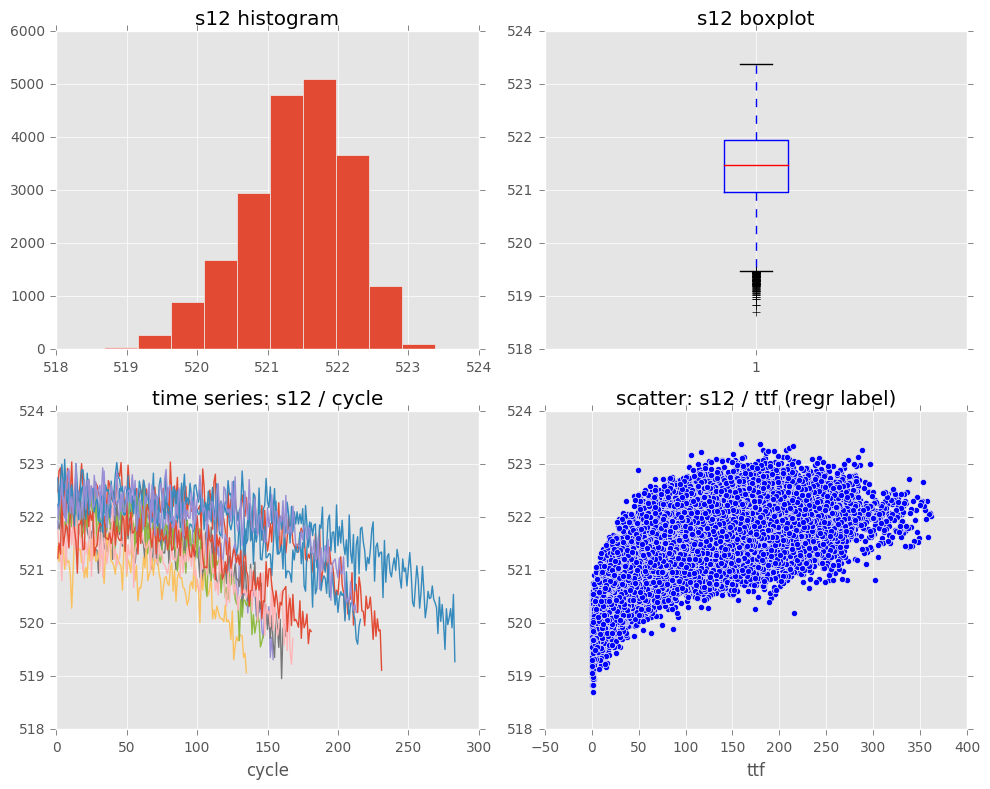

In [150]:
explore_col("s12", 10)

In [151]:
explore_col("s11", 10)

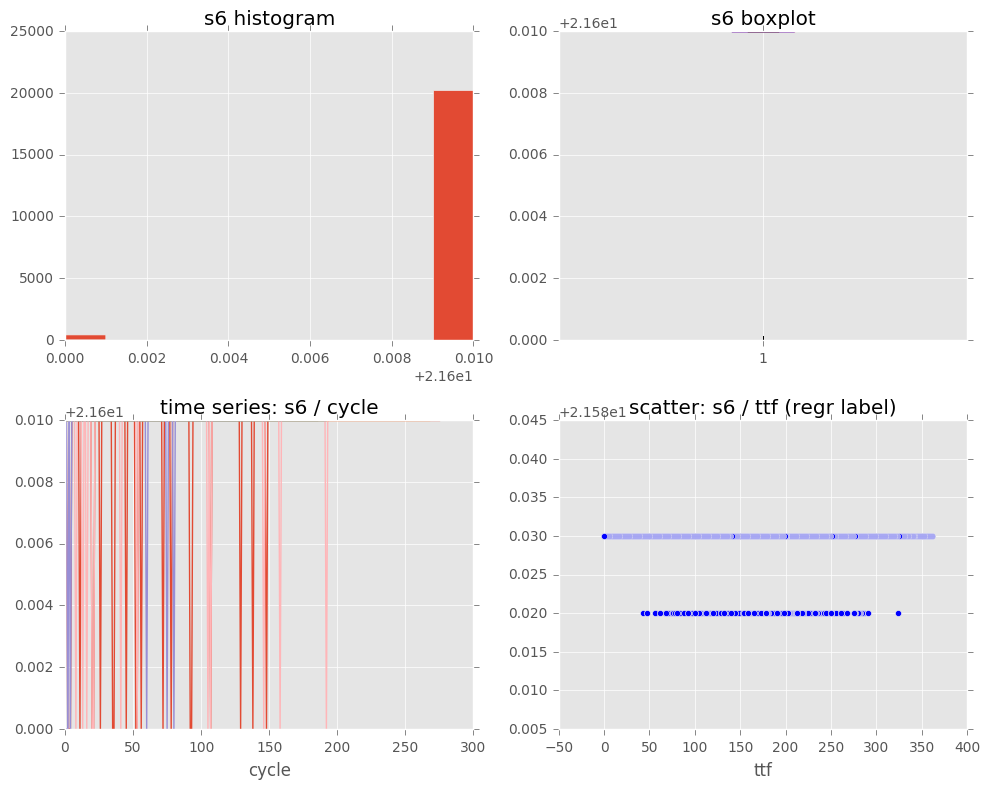

In [152]:
explore_col("s6", 10)

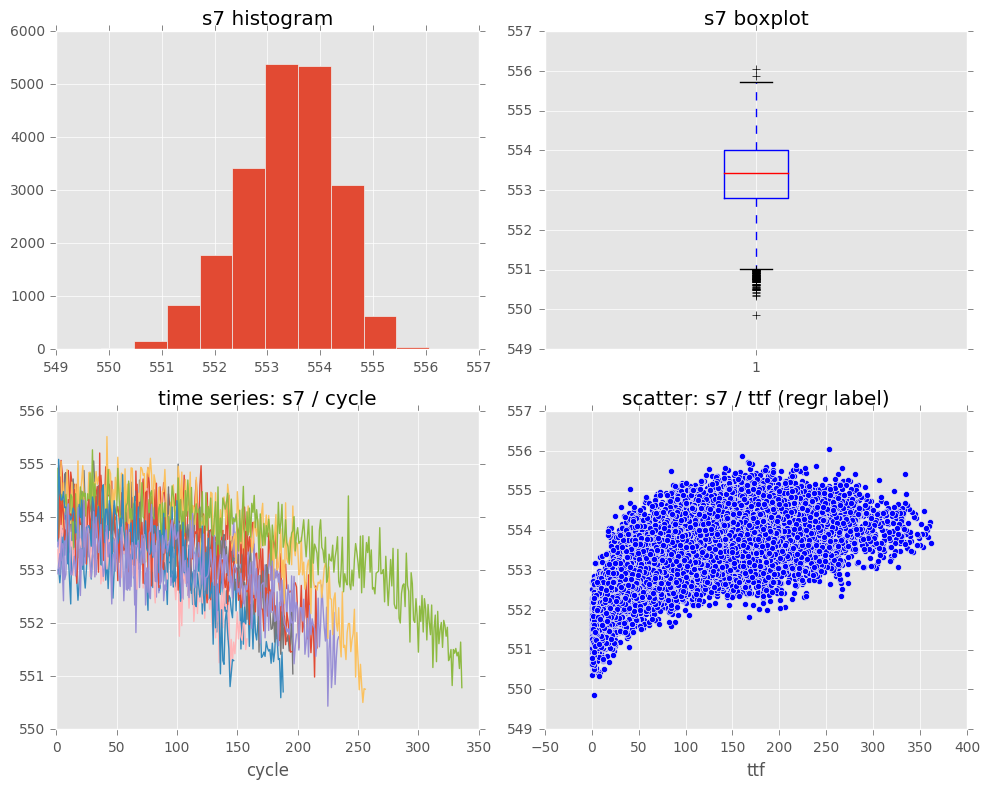

In [153]:
explore_col("s7", 10)

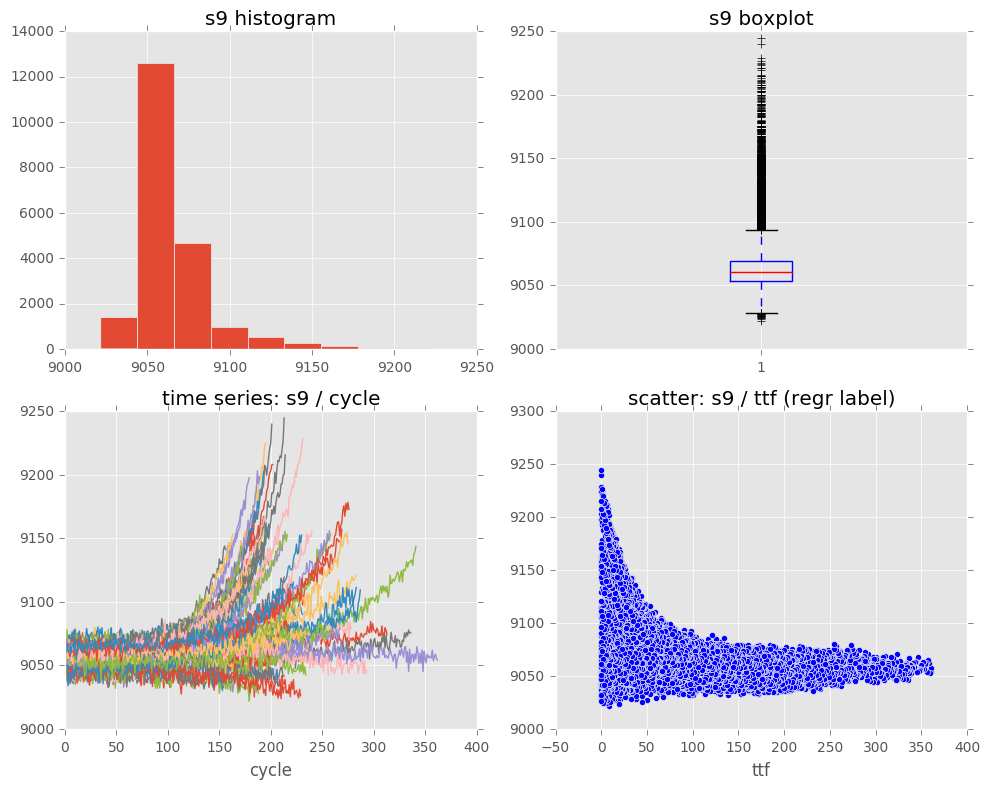

In [155]:
explore_col("s9", 100)

In [276]:
def plot_time_series(s):
    
    """
    plot time series of input sensor s for 10 random sample engines
    
    """
    
    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (12, 12))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
    
    for e_id in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()




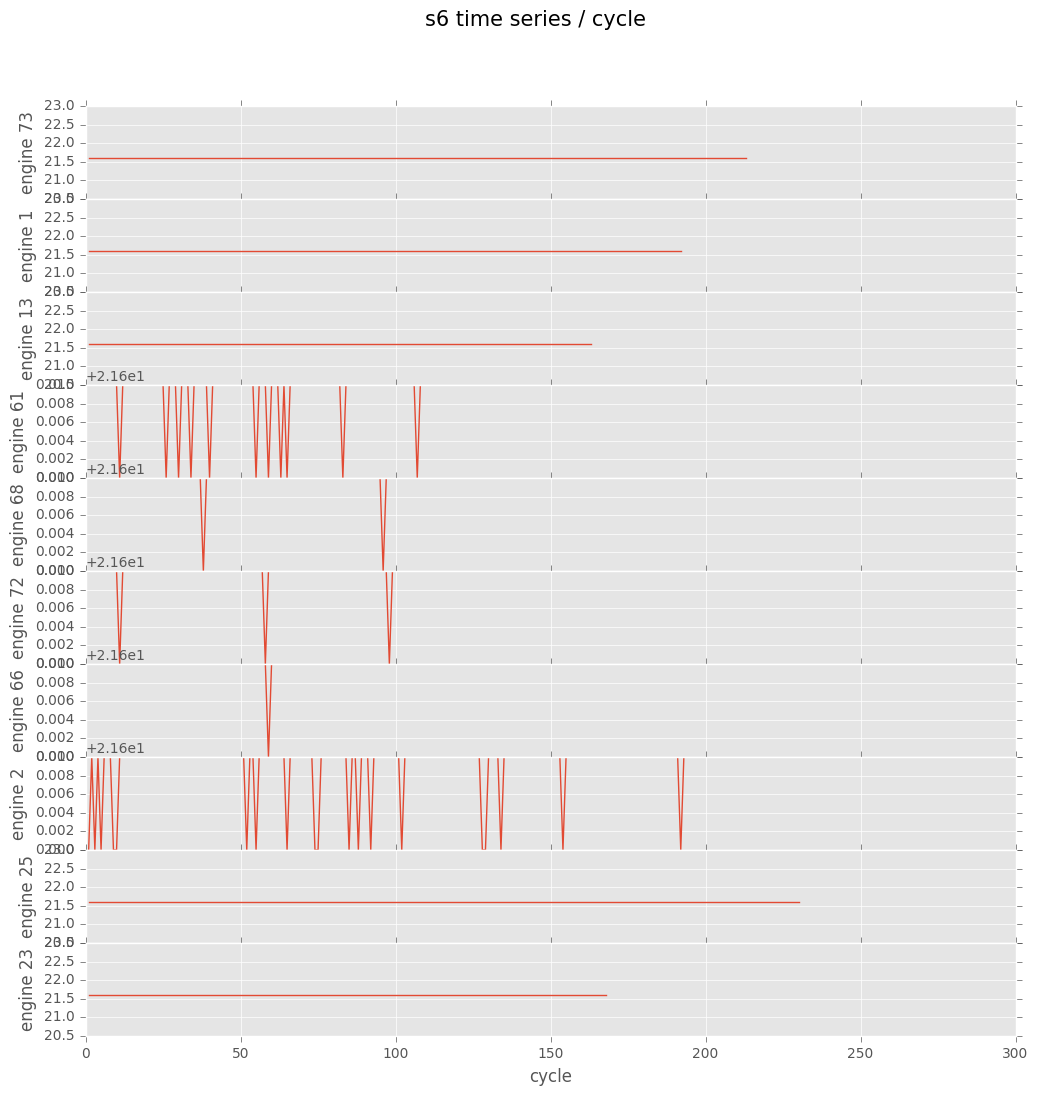

In [277]:
plot_time_series('s6')

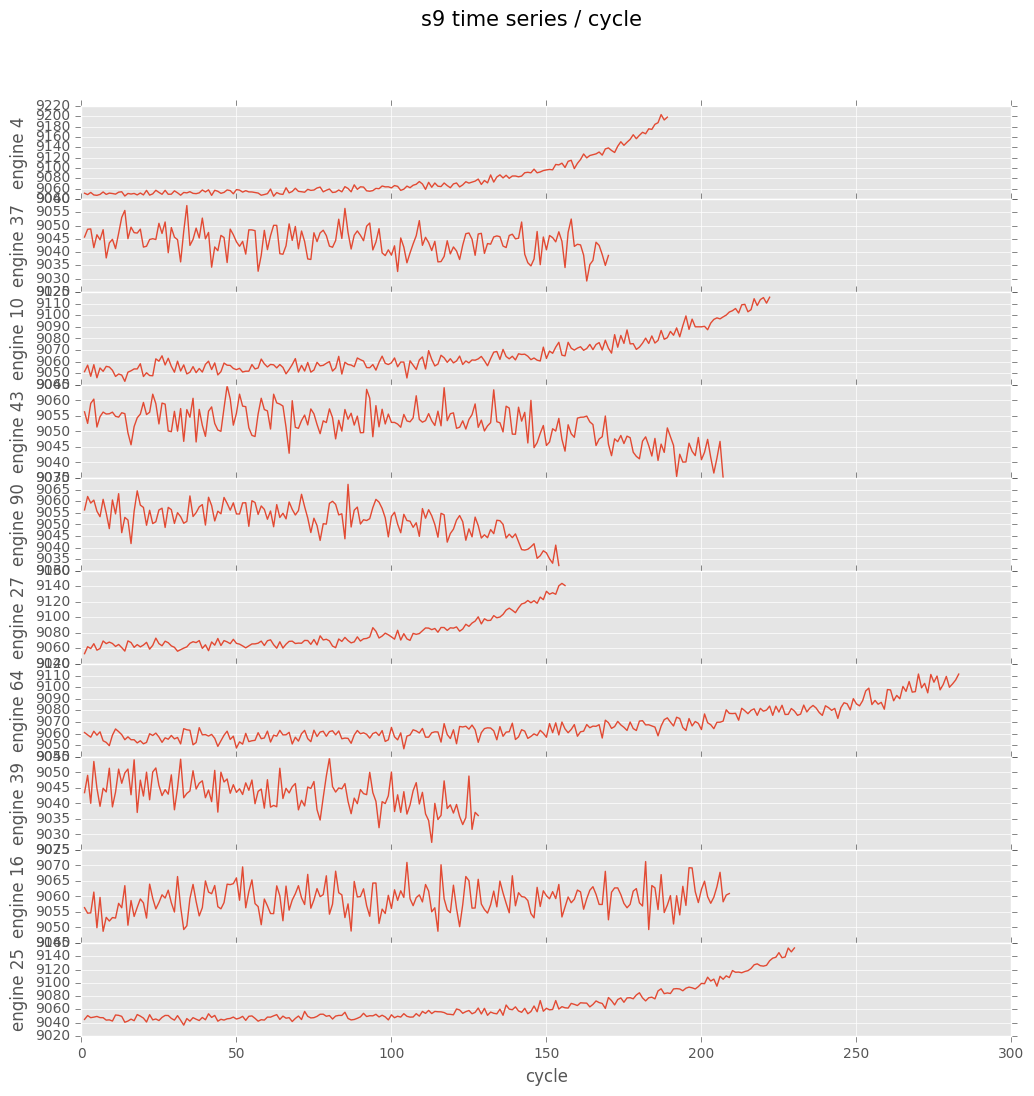

In [278]:
plot_time_series('s9')